# Метод золотого сечения и метод Ньютона

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Одномерная оптимизация. Метод золотого сечения

**Задача 17.59.** Методом золотого сечения найти точку минимума $x^*$ функции $f(x) = -x^3 + 3(1 + x)[ln(1+x) - 1]$ на отрезке $x \in [-0,5; 0,5]$ с точностью $\varepsilon = 0,05$.

In [2]:
def f(x):
    return -x ** 3 + 3 * (1 + x) * (np.log(1 + x) - 1)

### Метод золотого сечения

**Метод золотого сечения (Golden Section Search)** основан на идее деления интервала поиска на две части в определенном соотношении, которое называется «золотым сечением». Этот метод эффективен при поиске минимума (или максимума) в унимодальных (одномерных) функциях, то есть функциях, которые имеют только одну точку экстремума в заданном интервале.

**Суть метода заключается в следующих шагах:**

1. Задаются две точки, ограничивающие интервал поиска: $a$ и $b$ (в нашем случае $a = -0.5$, $b = 0.5$)

2. Задаются «константы золотого сечения»: $g_1 = \frac{3 - \sqrt5}{2}$, $g_2 = \frac{\sqrt5 - 1}{2}$
    
3. Вычисляется две промежуточные точки внутри интервала: $c = g_1(b - a) + a$  и $d = g_2(b - a) + a$ 
    
4. Вычисляются значения функции  в точках c и d. Из двух новых точек (c и d) выбирается одна следующим образом: если $f(c) \leq f(d)$, то $b = d$; если же $f(c) > f(d)$, то $a = c$
    
5. Затем интервал поиска обновляется, и одна из начальных точек (a или b) заменяется выбранной точкой (c или d), сохраняя условие, что интервал поиска содержит минимум функции

6. Процесс повторяется до тех пор, пока длина интервала поиска не станет меньше определенного порогового значения $\varepsilon$

In [3]:
def Golden_Section_Search(a, b, eps):

    g1 = (3 - np.sqrt(5)) / 2
    g2 = (np.sqrt(5) - 1) / 2
    
    k = 0
    intervals = [(a, b)]
    
    while (b - a) / 2 > eps:
        
        k += 1
        
        c = g1 * (b - a) + a
        d = g2 * (b - a) + a

        if f(c) <= f(d):
            b = d

        elif f(c) > f(d): 
            a = c
        
        intervals.append((a, b))

    x_min = (a + b) / 2
    
    return x_min, k, intervals 

Найдём точку минимума $x^*$ и минимальное значение $f^*$ исходной функции на отрезке $x \in [-0.5; 0.5]$ с точностью $\varepsilon = 0.05$, а также найдём количество шагов $k$

In [4]:
a = -0.5
b = 0.5
epsilon = 0.05
x_min, k, iterations = Golden_Section_Search(a, b, epsilon)
print('x* =', x_min, '\nf* =', f(x_min), '\nk =', k)

x* = 0.01722092687431649 
f* = -2.9995627983194226 
k = 5


Посмотрим, что будет происходить при уменьшении $\varepsilon$:

In [5]:
a = -0.5
b = 0.5
epsilon = 0.005
x_min, k, iterations = Golden_Section_Search(a, b, epsilon)
print('x* =', x_min, '\nf* =', f(x_min), '\nk =', k)

x* = 0.0025124993703207173 
f* = -2.9999905548012293 
k = 10


In [6]:
a = -0.5
b = 0.5
epsilon = 0.0005
x_min, k, iterations = Golden_Section_Search(a, b, epsilon)
print('x* =', x_min, '\nf* =', f(x_min), '\nk =', k)

x* = -3.0249240612345574e-17 
f* = -3.0 
k = 15


In [7]:
a = -0.5
b = 0.5
epsilon = 0.00005
x_min, k, iterations = Golden_Section_Search(a, b, epsilon)
print('x* =', x_min, '\nf* =', f(x_min), '\nk =', k)

x* = 1.2625306171694025e-05 
f* = -2.9999999997609055 
k = 20


**Вывод:** при уменьшении $\varepsilon$, количество итераций увеличивается на одинаковое количество шагов, значит сходимость линейная

Изобразим поиск минимума с использованием метода золотого сечения при $\varepsilon = 0.05$ на графике:

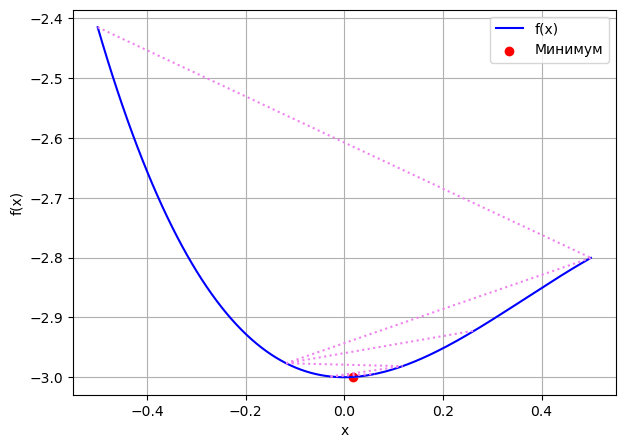

In [8]:
a = -0.5
b = 0.5
epsilon = 0.05
x_min, k, intervals = Golden_Section_Search(a, b, epsilon)

x = np.linspace(a, b, 200)
y = f(x)

# Построение графика
plt.figure(figsize=(7, 5))
plt.plot(x, y, color='blue', label='f(x)')
plt.scatter([x_min], [f(x_min)], color='red', marker='o', label='Минимум')

# Отмечаем интервалы, которые рассматривались в процессе
for interval in intervals:
    a, b = interval
    plt.plot([a, b], [f(a), f(b)], color='violet', linestyle=':')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

## 2. Многомерная оптимизация (безусловная). Метод Ньютона 

**Задача 17.155.** Методом Ньютона минимизировать функцию $f(x) = x^4_1 + x^4_2 + \sqrt{2 + x^2_1 + x^2_2} - 2x_1 + 3x_2$

**Метод Ньютона (Ньютона-Рафсона)** работает следующим образом:

1. Начнаем с некоторой начальной точки (вектора) $x_0$

2. Находим градиент функции (вектор первых производных) и гессиан (матрицу вторых производных) функции в текущей точке. Градиент указывает направление наискорейшего возрастания функции, а гессиан определяет кривизну функции в данной точке

3. Метод Ньютона выполняет итерацию

    $x_{k+1}=x_k - \frac{\nabla f(x)}{\nabla^2 f(x)}$, $\qquad k \geq 0$

4. Повторяем шаги 2-3 до тех пор, пока не будет выполнен критерий останова: $\frac{}{}$.

Метод Ньютона может сходиться к оптимальному решению достаточно быстро, особенно когда функция близка к квадратичной форме. Однако сходимость не всегда гарантирована, и в некоторых случаях метод может быть неустойчивым, особенно если гессиан неопределен или плохо обусловлен. Для решения этих проблем часто используются модификации метода Ньютона (например, метод сопряженных градиентов)

**Для начала задаём функцию и аналитически вычисляем градиент и гессиан функции:**

$f(x) = x^4_1 + x^4_2 + \sqrt{2 + x^2_1 + x^2_2} - 2x_1 + 3x_2$
    
$\nabla f(x) = \Big(4x_1^3 + \frac{x_1}{\sqrt{2 + x_1^2 + x_2^2}} - 2, 4x_2^3 + \frac{x_2}{\sqrt{2 + x_1^2 + x_2^2}} + 3\Big)$

$H = \nabla^2 f(x) =
\begin{pmatrix} 
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1 \partial x_2}\\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2f}{\partial x_2^2}\\
\end{pmatrix} =
\begin{pmatrix} 
12x_1^2 + \frac{2 + x_2^2}{(2 + x_1^2 + x_2^2)^{\frac{3}{2}}} & -\frac{x_1x_2}{(2 + x_1^2 + x_2^2)^{\frac{3}{2}}}\\
-\frac{x_1x_2}{(2 + x_1^2 + x_2^2)^{\frac{3}{2}}} & 12x_2^2 +\frac{2 + x_1^2}{(2 + x_1^2 + x_2^2)^{\frac{3}{2}}}\\
\end{pmatrix}$

In [9]:
def function(x):
    return x[0] ** 4 + x[1] ** 4 + np.sqrt(2 + x[0] ** 2 + x[1] ** 2) - 2 * x[0] + 3 * x[1]

def gradient(x):
    return np.array([4 * x[0] ** 3 + x[0] / (np.sqrt(2 + x[0] ** 2 + x[1] ** 2)) - 2, 
                     4 * x[1] ** 3 + x[1] / (np.sqrt(2 + x[0] ** 2 + x[1] ** 2)) + 3])
    
def hessian(x):
    
    denominator = (2 + x[0] ** 2 + x[1] ** 2) ** (3/2)
    hessian11 = 12 * x[0] ** 2 + (2 + x[1] ** 2) / denominator
    hessian12 = - x[0] * x[1] / denominator
    hessian22 = 12 * x[1] ** 2 + (2 + x[0] ** 2) / denominator
    
    return np.array([[hessian11, hessian12], [hessian12, hessian22]])

**3D график функции $f(x)$**

In [10]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = function([x, y])

Text(0.5, 0.5, 'x2')

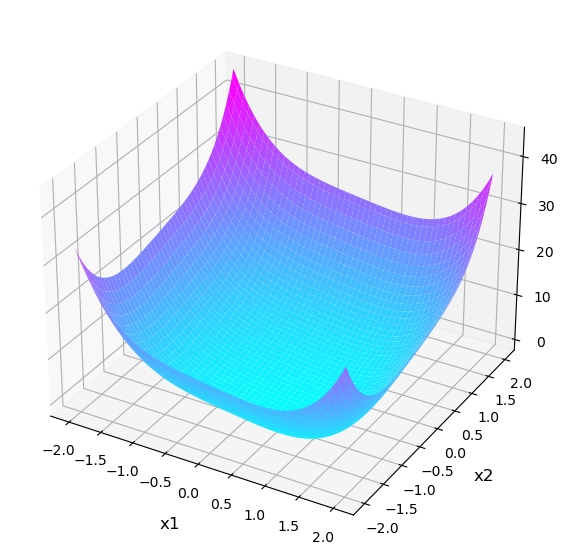

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
a = ax.plot_surface(x, y, z, cmap='cool')
ax.set_xlabel('x1', fontsize = 12, labelpad=10)
ax.set_ylabel('x2', fontsize = 12, labelpad=10)

**Контурный график**

Text(0, 0.5, 'x2')

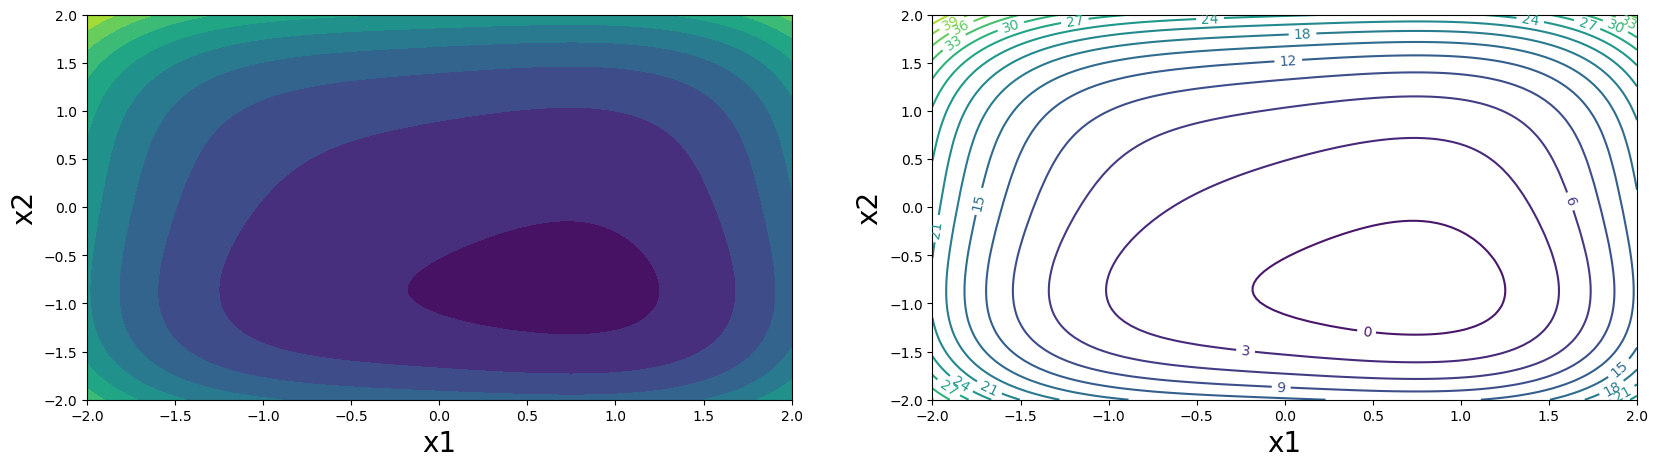

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].contourf(x, y, z, 10)
ax[0].set_xlabel('x1', fontsize = 20)
ax[0].set_ylabel('x2', fontsize = 20)

cp = ax[1].contour(x, y, z, 17, linestyles='solid')
ax[1].clabel(cp, inline=1, fontsize=10)
ax[1].set_xlabel('x1', fontsize = 20)
ax[1].set_ylabel('x2', fontsize = 20)

**Реализуем методом Ньютона для заданной функции, начиная с указанной точки $x_0$**

In [13]:
def Newton_method(f, x0, kmax):
    
    x = x0
    k = 0
    steps = []
    steps.append([x[0], x[1]])

    while (max(abs(gradient(x))) > 1e-3):
        
        k += 1
        x = x - np.dot(gradient(x), np.linalg.inv(hessian(x)))
        
        if k == kmax:
            print('Метод Ньютона расходится')
            break
        else:
            steps.append([x[0], x[1]])
            
    return k, x, steps

In [14]:
def Draw_contour(x, y, z, steps):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].contourf(x, y, z, 20)
    ax[0].set_xlabel('x1', fontsize = 20)
    ax[0].set_ylabel('x2', fontsize = 20)

    cp = ax[1].contour(x, y, z, 20, linestyles='solid')
    ax[1].clabel(cp, inline=1, fontsize=10)
    ax[1].set_xlabel('x1', fontsize = 20)
    ax[1].set_ylabel('x2', fontsize = 20)

    if steps is not None:
        steps = np.matrix(steps)
        ax[0].plot(steps[:,0], steps[:,1], '-o', color='white')
        ax[1].plot(steps[:,0], steps[:,1], '-o', color='purple')

x0 = [0 0] 
(x1, x2) = [ 0.73581627 -0.85795263] 
f* = -1.400142013120402 
k = 8 



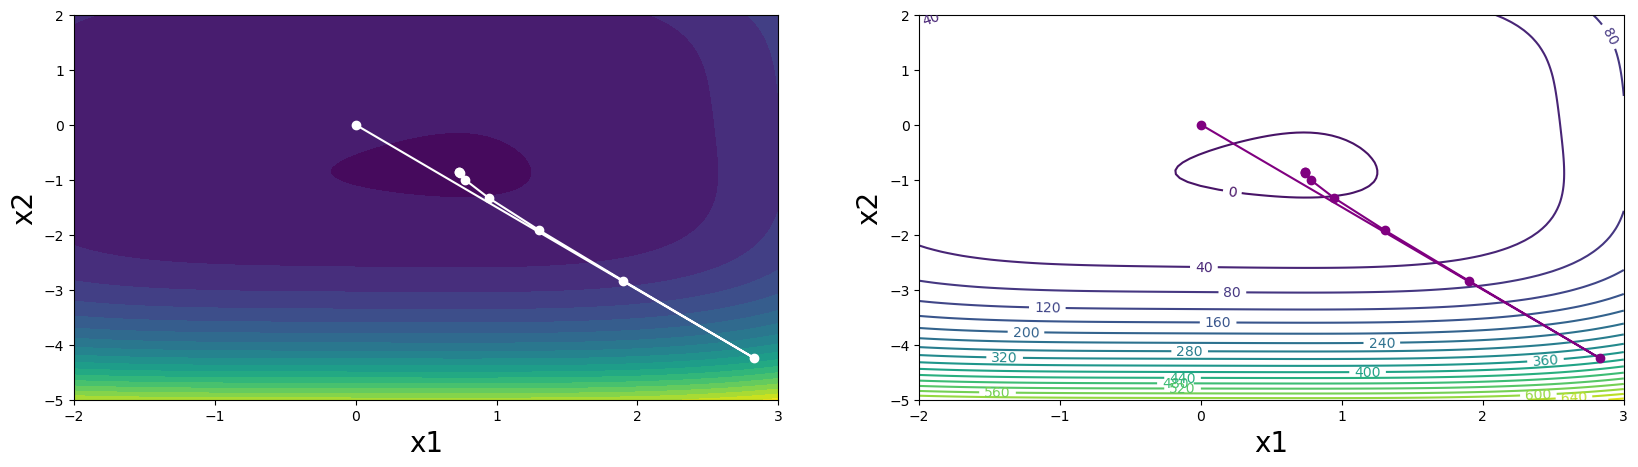

In [15]:
x0 = np.array([0, 0])
k, x_min, steps = Newton_method(f, x0, kmax=100)
print('x0 =', x0, '\n(x1, x2) =', x_min, '\nf* =', function(x_min), '\nk =', k, '\n')

x = np.linspace(-2, 3, 100)
y = np.linspace(-5, 2, 100)
x, y = np.meshgrid(x, y)
z = function([x, y])

Draw_contour(x, y, z, steps)

x0 = [ 5 -1] 
(x1, x2) = [ 0.73589481 -0.85795313] 
f* = -1.400141991659134 
k = 7 



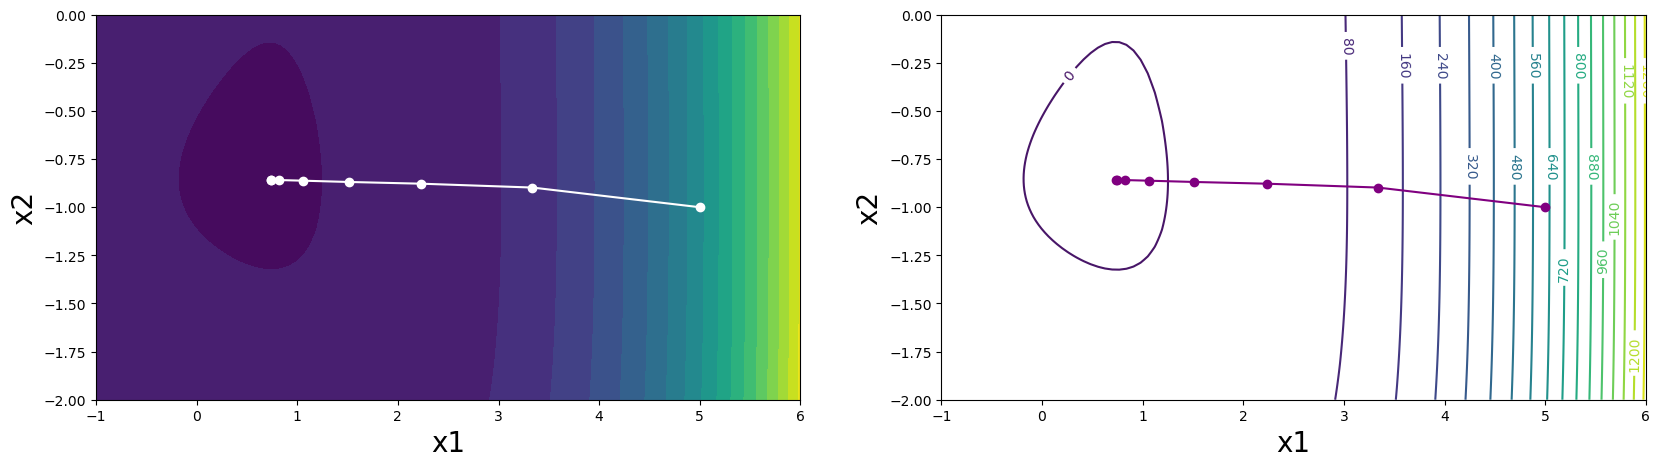

In [16]:
x0 = np.array([5, -1])
k, x_min, steps = Newton_method(f, x0, kmax=100)
print('x0 =', x0, '\n(x1, x2) =', x_min, '\nf* =', function(x_min), '\nk =', k, '\n')

x = np.linspace(-1, 6, 100)
y = np.linspace(-2, 0, 100)
x, y = np.meshgrid(x, y)
z = function([x, y])

Draw_contour(x, y, z, steps)

x0 = [0 5] 
(x1, x2) = [ 0.73581643 -0.85796508] 
f* = -1.400142012383508 
k = 13 



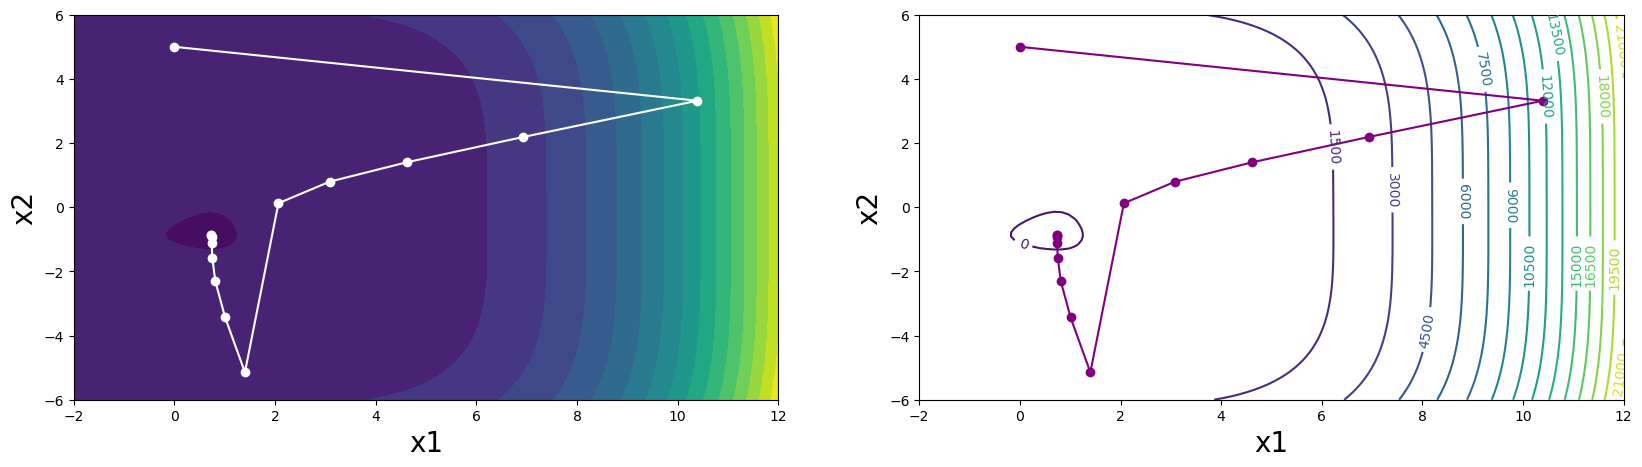

In [17]:
x0 = np.array([0, 5])
k, x_min, steps = Newton_method(f, x0, kmax=100)
print('x0 =', x0, '\n(x1, x2) =', x_min, '\nf* =', function(x_min), '\nk =', k, '\n')

x = np.linspace(-2, 12, 100)
y = np.linspace(-6, 6, 100)
x, y = np.meshgrid(x, y)
z = function([x, y])

Draw_contour(x, y, z, steps)

x0 = [5 0] 
(x1, x2) = [ 0.73581629 -0.85795379] 
f* = -1.4001420131123896 
k = 11 



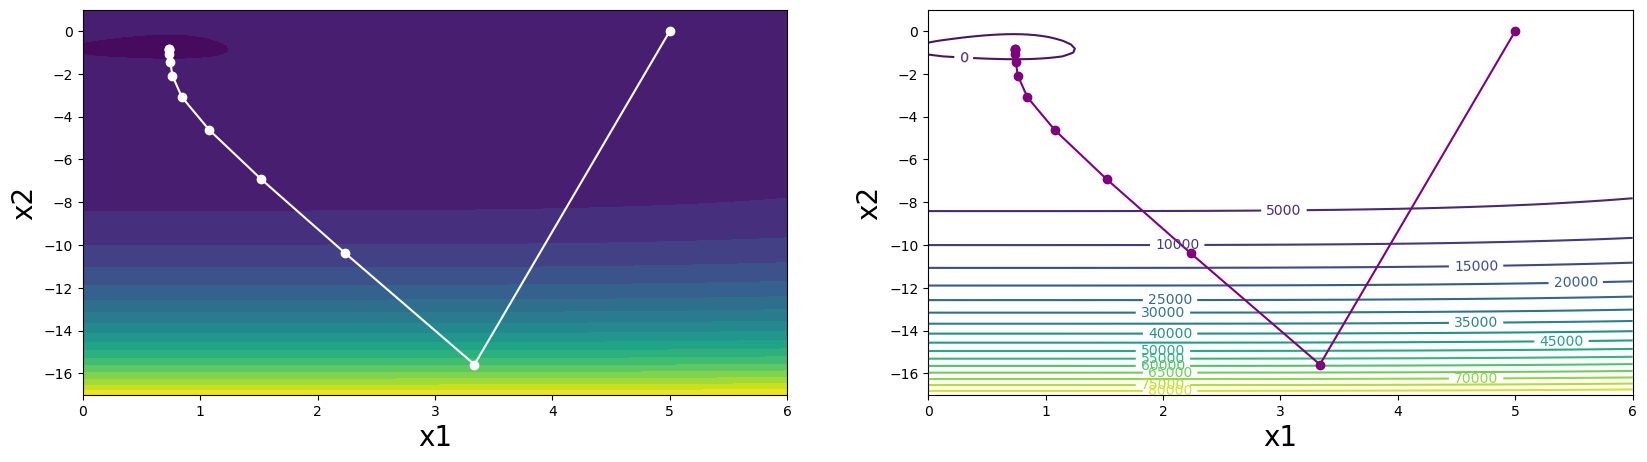

In [18]:
x0 = np.array([5, 0])
k, x_min, steps = Newton_method(f, x0, kmax=100)
print('x0 =', x0, '\n(x1, x2) =', x_min, '\nf* =', function(x_min), '\nk =', k, '\n')

x = np.linspace(0, 6, 100)
y = np.linspace(-17, 1, 100)
x, y = np.meshgrid(x, y)
z = function([x, y])

Draw_contour(x, y, z, steps)

Метод Ньютона не всегда гарантирует монотонное уменьшение значения функции на каждой новой итерации. Возможность попадания на точку, в которой значение функции больше, чем на предыдущей итерации, может объясняться несколькими факторами:

1. Если начальная точка выбрана плохо, то на некоторых итерациях значение функции может увеличиваться
2. Метод Ньютона может быть неустойчивым, особенно когда гессиан функции плохо обусловлен или неопределен. Это может привести к нестабильным итерациям, где значение функции может «прыгать» вокруг оптимума
3. Если на каждой итерации шаг метода Ньютона выбран недостаточно малым, это может привести к перепрыгиванию оптимума

Часто метод Ньютона модифицируется включем небольшого размера шага $0 \lt \alpha \leq 1$ вместо $\alpha = 1$:

$x_{k+1} = x_k - \alpha H_f^{-1}(x_k) \nabla f(x_k)$.

Из-за умножения на $\alpha$ значительно увеличится количество итераций, но уменьшение значения функции на каждой новой итерации будет монотонным.

In [19]:
def Newton_method_new(f, x0, kmax, alpha):
    
    x = x0
    k = 0
    steps = []
    steps.append([x[0], x[1]])

    while (max(abs(gradient(x))) > 1e-3):
        
        k += 1
        x = x - alpha * np.dot(gradient(x), np.linalg.inv(hessian(x)))
        
        if k == kmax:
            print('Метод Ньютона расходится')
            break
        else:
            steps.append([x[0], x[1]])
            
    return k, x, steps

x0 = [0 0] 
(x1, x2) = [ 0.73568865 -0.85794354] 
f* = -1.4001419562182005 
k = 32 

x0 = [ 5 -1] 
(x1, x2) = [ 0.73595356 -0.8579542 ] 
f* = -1.4001419475443622 
k = 61 

x0 = [0 5] 
(x1, x2) = [ 0.73582457 -0.85805381] 
f* = -1.4001419654006315 
k = 59 

x0 = [5 0] 
(x1, x2) = [ 0.73595402 -0.85798068] 
f* = -1.4001419438248772 
k = 61 



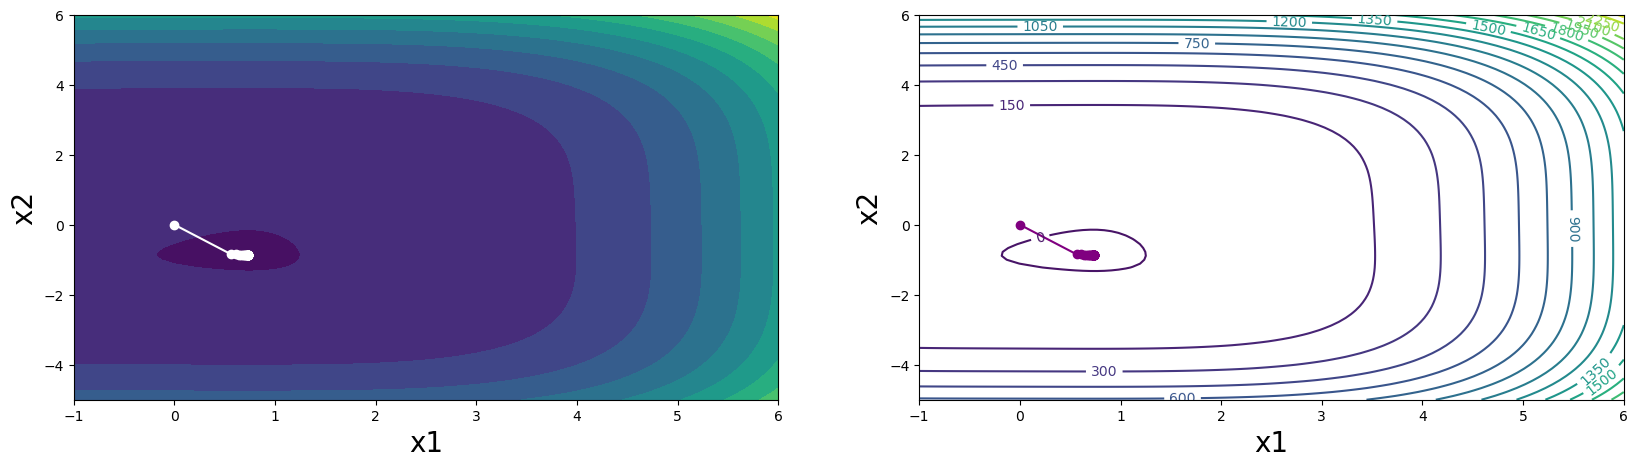

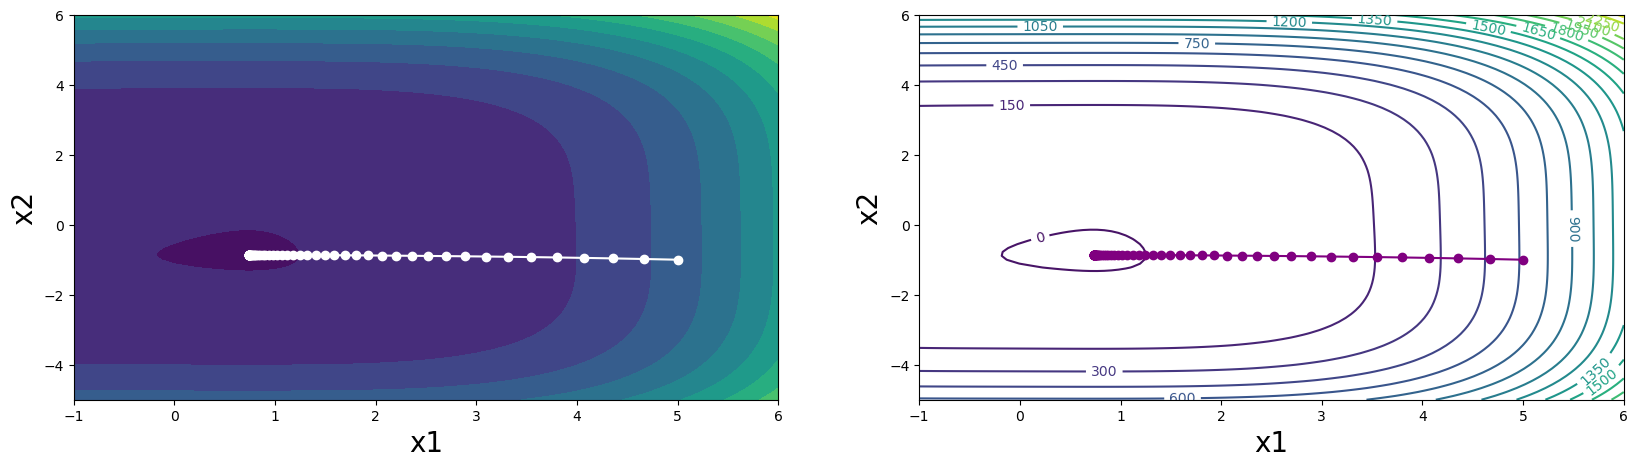

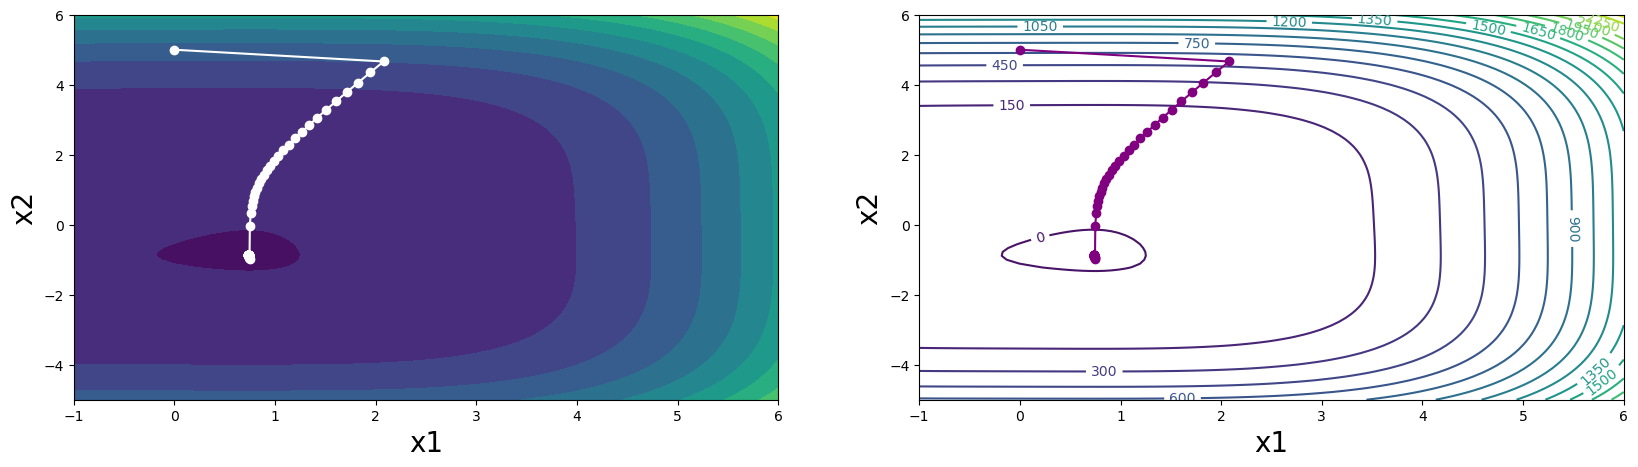

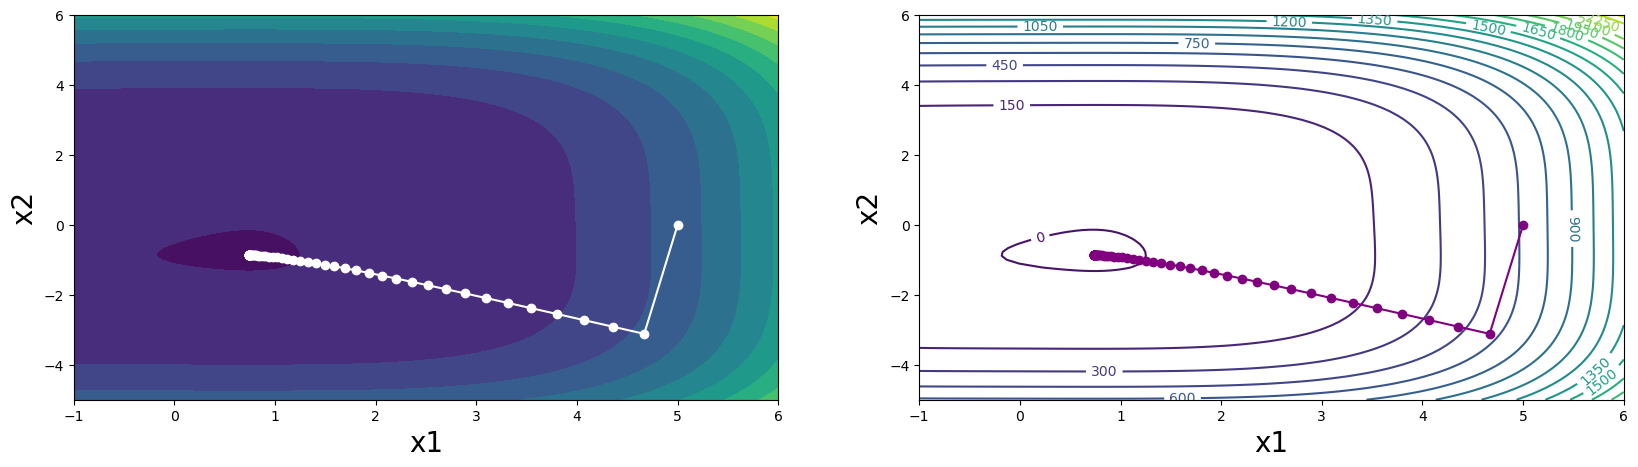

In [20]:
x0 = np.array([[0, 0], [5, -1], [0, 5], [5, 0]])  # начальные приближения

for i in x0:
    k, x_min, steps = Newton_method_new(f, i, kmax=100, alpha=0.2)
    print('x0 =', i, '\n(x1, x2) =', x_min, '\nf* =', function(x_min), '\nk =', k, '\n')
    
    x = np.linspace(-1, 6, 100)
    y = np.linspace(-5, 6, 100)
    x, y = np.meshgrid(x, y)
    z = function([x,y])

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].contourf(x, y, z, 10)
    ax[0].set_xlabel('x1', fontsize = 20)
    ax[0].set_ylabel('x2', fontsize = 20)

    cp = ax[1].contour(x, y, z, 25, linestyles='solid')
    ax[1].clabel(cp, inline=1, fontsize=10)
    ax[1].set_xlabel('x1', fontsize = 20)
    ax[1].set_ylabel('x2', fontsize = 20)

    if steps is not None:
        steps = np.matrix(steps)
        ax[0].plot(steps[:,0], steps[:,1], '-o', color='white')
        ax[1].plot(steps[:,0], steps[:,1], '-o', color='purple')